In [129]:
import pandas as pd
from scipy import stats

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [29]:
sns.set_context('paper')

In [61]:
df = pd.read_csv('DistractWM_BehavioralData_forDan.txt', sep='\t')

### Modularity

In [248]:
q_df = df.drop([1,9]).melt(id_vars='subject', value_vars=['Rest_Q', 'r1_Q', 'r2_Q', 'r3_Q', 'r4_Q', 'r5_Q', 'r6_Q',
       'r7_Q', 'r8_Q', 'r9_Q', 'r10_Q'], value_name='Q', var_name='run')

In [249]:
q_df = q_df.replace(['Rest_Q', 'r1_Q', 'r2_Q', 'r3_Q', 'r4_Q', 'r5_Q', 'r6_Q',
       'r7_Q', 'r8_Q', 'r9_Q', 'r10_Q'], [str(i).zfill(2) for i in range(11)])

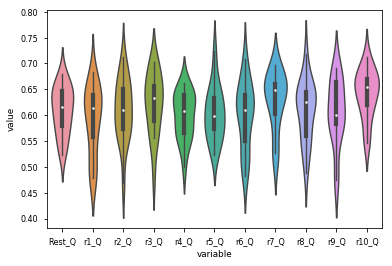

In [250]:
sns.violinplot('variable', 'value', data=df.loc[:,:'r10_Q'].melt('subject'), )

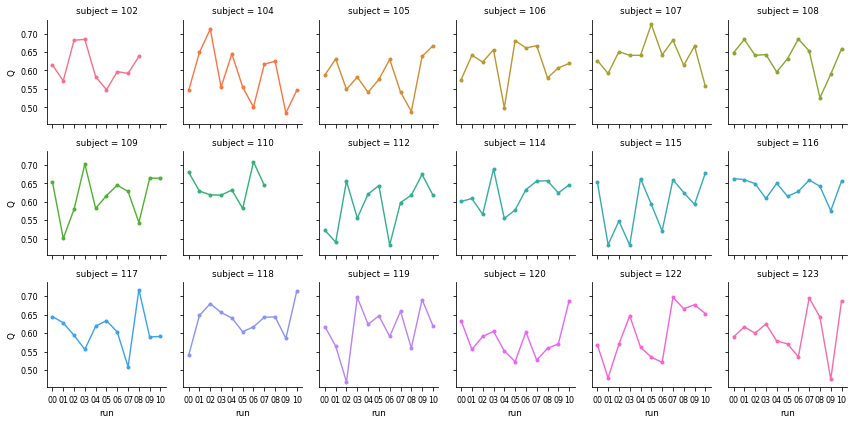

In [253]:
grid = sns.FacetGrid(q_df, col="subject", hue='subject', col_wrap=6, size=2)

grid.map(plt.plot, "run", "Q", marker="o", ms=4)

### Merge Modularity + Behavior DFs

In [254]:
prt_df = df.melt(id_vars='subject', value_vars=['r1_ProbeRT', 'r2_ProbeRT', 'r3_ProbeRT',
       'r4_ProbeRT', 'r5_ProbeRT', 'r6_ProbeRT', 'r7_ProbeRT', 'r8_ProbeRT',
       'r9_ProbeRT', 'r10_ProbeRT'],
                value_name='ProbeRT', var_name='run')

In [255]:
prt_df = prt_df.replace(['r1_ProbeRT', 'r2_ProbeRT', 'r3_ProbeRT',
       'r4_ProbeRT', 'r5_ProbeRT', 'r6_ProbeRT', 'r7_ProbeRT', 'r8_ProbeRT',
       'r9_ProbeRT', 'r10_ProbeRT'], [str(i).zfill(2) for i in range(1,11)])

In [256]:
q_prt_df = pd.merge(left=q_df.iloc[20:], right=prt_df, on=['subject','run'])

In [257]:
pa_df = df.melt(id_vars='subject', value_vars=['r1_ProbeAccuracy','r2_ProbeAccuracy','r3_ProbeAccuracy','r4_ProbeAccuracy',
                                               'r5_ProbeAccuracy','r6_ProbeAccuracy','r7_ProbeAccuracy','r8_ProbeAccuracy',
                                               'r9_ProbeAccuracy','r10_ProbeAccuracy'],
                value_name='ProbeAccuracy', var_name='run')

In [258]:
pa_df = pa_df.replace(['r1_ProbeAccuracy','r2_ProbeAccuracy','r3_ProbeAccuracy','r4_ProbeAccuracy',
                         'r5_ProbeAccuracy','r6_ProbeAccuracy','r7_ProbeAccuracy','r8_ProbeAccuracy',
                         'r9_ProbeAccuracy','r10_ProbeAccuracy'], [str(i).zfill(2) for i in range(1,11)])

In [259]:
q_prt_pa_df = pd.merge(left=q_prt_df, right=pa_df, on=['subject','run'])

In [260]:
sa_df = df.melt(id_vars='subject', value_vars=['r1_SearchAccuracy', 'r2_SearchAccuracy',
       'r3_SearchAccuracy', 'r4_SearchAccuracy', 'r5_SearchAccuracy',
       'r6_SearchAccuracy', 'r7_SearchAccuracy', 'r8_SearchAccuracy',
       'r9_SearchAccuracy', 'r10_SearchAccuracy'],
                value_name='SearchAccuracy', var_name='run')

In [261]:
sa_df = sa_df.replace(['r1_SearchAccuracy', 'r2_SearchAccuracy',
       'r3_SearchAccuracy', 'r4_SearchAccuracy', 'r5_SearchAccuracy',
       'r6_SearchAccuracy', 'r7_SearchAccuracy', 'r8_SearchAccuracy',
       'r9_SearchAccuracy', 'r10_SearchAccuracy'], [str(i).zfill(2) for i in range(1,11)])

In [262]:
q_prt_pa_sa_df = pd.merge(left=q_prt_pa_df, right=sa_df, on=['subject','run'])

In [263]:
srt_df = df.melt(id_vars='subject', value_vars=['r1_SearchRT', 'r2_SearchRT',
       'r3_SearchRT', 'r4_SearchRT', 'r5_SearchRT', 'r6_SearchRT',
       'r7_SearchRT', 'r8_SearchRT', 'r9_SearchRT', 'r10_SearchRT'],
                value_name='SearchRT', var_name='run')

In [264]:
srt_df = srt_df.replace(['r1_SearchRT', 'r2_SearchRT',
       'r3_SearchRT', 'r4_SearchRT', 'r5_SearchRT', 'r6_SearchRT',
       'r7_SearchRT', 'r8_SearchRT', 'r9_SearchRT', 'r10_SearchRT'], [str(i).zfill(2) for i in range(1,11)])

In [265]:
q_prt_pa_sa_srt_df = pd.merge(left=q_prt_pa_sa_df, right=srt_df, on=['subject','run'])

In [266]:
q_behav_df = q_prt_pa_sa_srt_df

### Probe RT

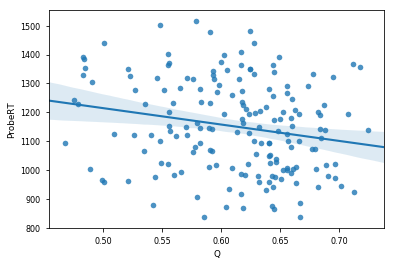

In [274]:
sns.regplot(x='Q', y='ProbeRT', data=q_behav_df)

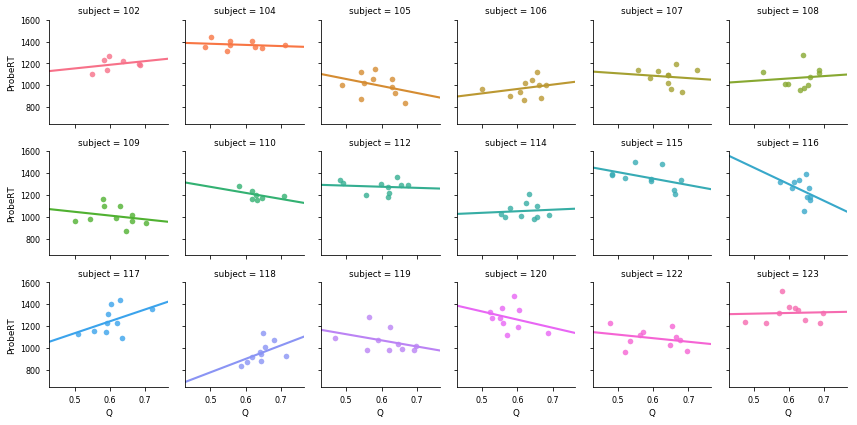

In [277]:
sns.lmplot(x="Q", y="ProbeRT", col="subject", hue="subject", data=q_behav_df,
           col_wrap=6, ci=None, size=2)

### Probe Accuracy

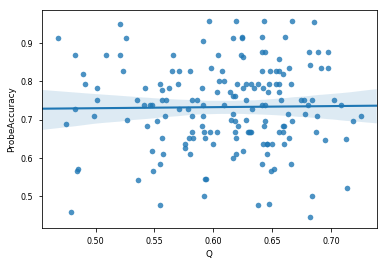

In [288]:
sns.regplot(x='Q', y='ProbeAccuracy', data=q_behav_df)

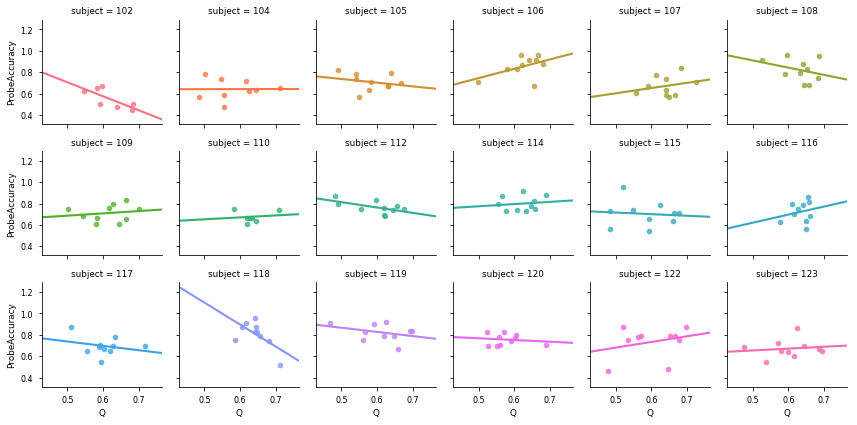

In [282]:
sns.lmplot(x="Q", y="ProbeAccuracy", col="subject", hue="subject", data=q_behav_df,
           col_wrap=6, ci=None, size=2)

### Search Accuracy

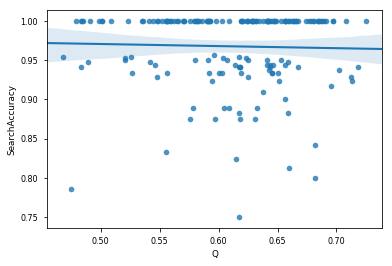

In [283]:
sns.regplot(x='Q', y='SearchAccuracy', data=q_behav_df)

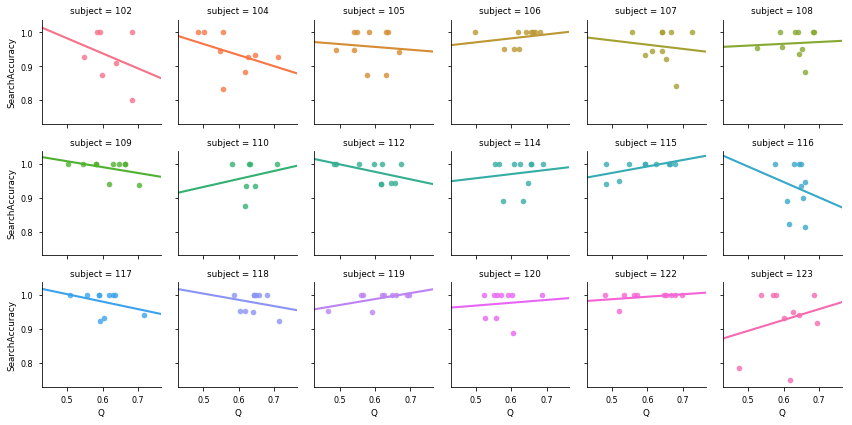

In [284]:
sns.lmplot(x="Q", y="SearchAccuracy", col="subject", hue="subject", data=q_behav_df,
           col_wrap=6, ci=None, size=2)

### Search RT

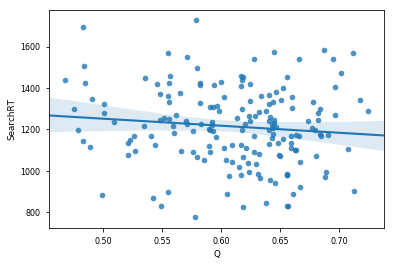

In [289]:
sns.regplot(x='Q', y='SearchRT', data=q_behav_df)

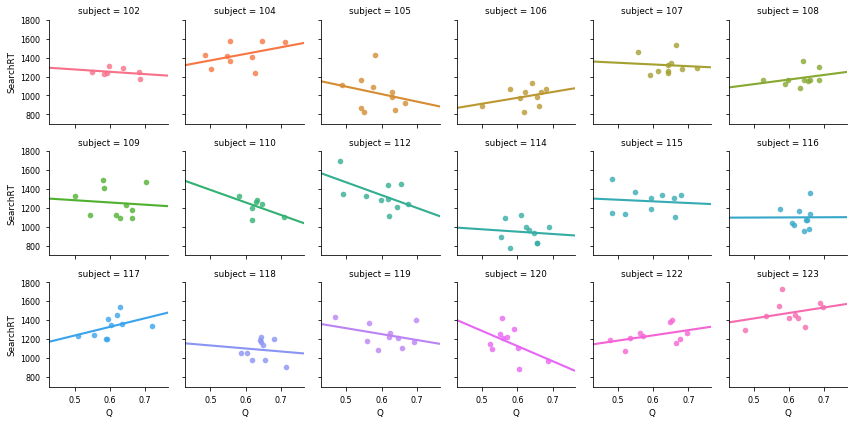

In [331]:
sns.lmplot(x="Q", y="SearchRT", col="subject", hue="subject", data=q_behav_df,
           col_wrap=6, ci=None, size=2)

### Resting Modularity vs. Overall Performance

In [307]:
q_behav_summary_df = pd.concat([df.drop([1,9]).iloc[:,0:2],df.drop([1,9]).iloc[:,57:]], axis=1)

In [310]:
q_behav_summary_df.columns

Index(['subject', 'Rest_Q', 'diff_easy_ProbeAccuracy',
       'diff_hard_ProbeAccuracy', 'same_easy_ProbeAccuracy',
       'same_hard_ProbeAccuracy', 'diff_easy_ProbeRT', 'diff_hard_ProbeRT',
       'same_easy_ProbeRT', 'same_hard_ProbeRT', 'diff_easy_SearchAccuracy',
       'diff_hard_SearchAccuracy', 'same_easy_SearchAccuracy',
       'same_hard_SearchAccuracy', 'diff_easy_SearchRT', 'diff_hard_SearchRT',
       'same_easy_SearchRT', 'same_hard_SearchRT'],
      dtype='object')

In [315]:
foo = q_behav_summary_df.melt(id_vars=['subject', 'Rest_Q'], value_vars=['diff_easy_ProbeAccuracy',
       'diff_hard_ProbeAccuracy', 'same_easy_ProbeAccuracy',
       'same_hard_ProbeAccuracy', 'diff_easy_ProbeRT', 'diff_hard_ProbeRT',
       'same_easy_ProbeRT', 'same_hard_ProbeRT', 'diff_easy_SearchAccuracy',
       'diff_hard_SearchAccuracy', 'same_easy_SearchAccuracy',
       'same_hard_SearchAccuracy', 'diff_easy_SearchRT', 'diff_hard_SearchRT',
       'same_easy_SearchRT', 'same_hard_SearchRT'], value_name='value', var_name='b_var')

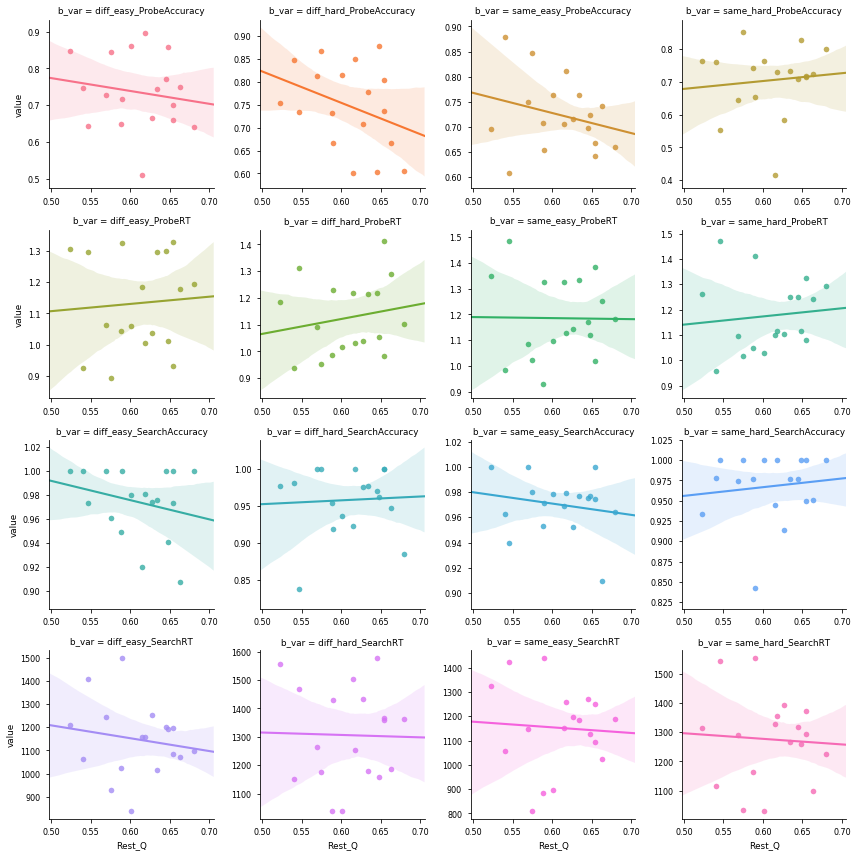

In [330]:
sns.lmplot(x="Rest_Q", y="value", col="b_var", hue="b_var", data=foo,
           col_wrap=4, ci=95, size=3, sharey=False, sharex=False)